# Сверточные нейронные сети (Convolutional neural networks). Архитектура AlexNet. Transfer learning

Семинар посвящен сверточным нейронным сетям (Convolutional neural networks или просто CNN). Они повсеместно используются в задачах компьютерного зрения, но их применение не ограничевается только этой областью.

### Классические задачи компьютерного зрения, решаемые с помощью глубокого обучения:
 - классификация объектов;
 - локализация и детектирование объектов;
 - сегментация объектов (object segmentation, instance segmentation);
 - генерация новых объектов (GANs).

### Зачем нужны сверточные нейросети? Почему нельзя использовать обычные полносвязные нейросети (fully connected)?

Предположим, что наше входное изображение цветное и имеет размер 1 МП (1000х1000). Тогда это изображение состоит из 3 000 000 объектов, то есть входной вектор в нейросеть будет иметь размерность 3 000 000. Если предположить, что первый слой на выходе будет иметь вектор размером 1000, то матрица весов будет состоять из 3 000 000 х 1 000 = 3 000 000 000 параметров!

**Это очень много.** Необходимо либо сжимать изображение (а изображение в 1 МП = это по современным меркам очень маленькое изображение), либо подавать это изображение на вход другому алгоритму. В качестве другого алгоритма мы возьмем как раз CNN.


## Устройство CNN

Операция свертки - это ключевая операция, которая выполняется в сверточных нейронных сетях. Сейчас мы расмотрим пример простейшей свертки - детектор вертикальных линий на изображении:

<img src="https://indoml.com/wp-content/uploads/2018/03/convolution-with-multiple-filters2.png?w=979" style="width:665px;height:320px;">

 - Первая матрица - это непосредственно изображение (для наглядности взято изображение в 36 пикселей, реальные изображения состоят из мегапикселей и десятков мегапикселей).
 - Вторая матрица - это матрица свёертки (она же фильтр, она же ядро свертки - convolution kernel).
 - Третья матрица - это изображение, полученное из исходного путем применения свертки.


### Примеры других фильтров для поиска границ:

 - Sobel filter:

 $$ \begin{pmatrix}
  1     & 0 & -1\\
  2 & 0 & -2 \\
  1 & 0 & -1
\end{pmatrix}$$

 - Scharr filter:
  $$ \begin{pmatrix}
  3     & 0 & -3\\
  10 & 0 & -10 \\
  3 & 0 & -3
\end{pmatrix}$$

### Внедрение обучаемых фильтров

Пусть теперь у нас нет фиксированного фильтра свертки, а есть фильтр, значения которого будут обучаться в процессе обучения:

$$W =  \begin{pmatrix}
  w_{11}     & w_{12} & w_{13}\\
  w_{21} & w_{22} & w_{23} \\
  w_{31} & w_{32} & w_{33}
\end{pmatrix}$$

### Понятие padding и stride

Как было видно из примеров выше, размер изображения после применения свертки уменьшается. Часто необходимо, чтобы этот размер не изменялся. В таком случае вводится такой метод как $\textbf{padding}$: вокруг исходного изображения добавляется рамка из фиксированных значений (например, нулей) такой толщины, чтобы после сворачивания изображения размер финального изображения был равен начальному размеру. Принято использовать следующую терминологию:
 - valid padding - padding не применяется;
 - same padding - применяется padding такого размера, чтобы полученное изображение было равно исходному по размеру.

$\textbf{stride}$ - это "шаг", который проделывает свертка при применении к изображению. Во всех предыдущих примерах stride был равен единице, если бы он был больше, то свертка "перескакивала бы".


<br>
<br>

Размер изображения после свертки (без padding-a при stride s=1):

$$\large n_{new} = n - f +1 \tag{3},$$

где n - размер исходного изображения,  f - размер фильтра.

Размер изображения при произвольном padding и stride:

$$\large n_{new} = [ \frac{n+2p-f}{s} + 1 ].\tag{4}$$

**NB** По договоренности размер фильтра f выбирают НЕЧЁТНЫМ.

### Действия после проведения свертки

После того, как получено изображение путем применения свертки над исходным изображением, к каждому значению нового изображения добавляется смещение b (обучаемый параметр), затем берется функция активации (как и в случае с обычными нейросетями). Эти операции (свертка, смещение, активация) определяют последовательность действий на одном слое одного фильтра.

## MaxPooling. AveragePooling

Еще одна операция, которая используется в CNN наряду со свёртками - это pooling размера n_p. MaxPooling -  это операция, при которой из участка картинки размера n_p x n_p выбирается максимальный элемент. AveragePooling - то же самое, только считается среднее значение на участке. Далее результаты записываются в матрицуу по аналогии с созданием свертки:

<img src="https://www.researchgate.net/publication/333593451/figure/fig2/AS:765890261966848@1559613876098/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max_W640.jpg" style="width:600px;height:600px;">

В отличие от операции свертки, здесь нет обучаемых параметров: изображение лишь делится на непересекающиеся участки, а из этих участков выделяются результирующие значения.

## AlexNet

[AlexNet paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

Ниже представлена архитектура нейросети для классификации изображений AlexNet:

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*bD_DMBtKwveuzIkQTwjKQQ.png" style="width:665px;height:320px;">

# Практика

Сегодня мы рассмотрим, как можно импортировать уже готовые и предобученные модели.

Также мы попробуем дообучить такую модель, поменяв количество классов в ней (то есть заменив последние слои).

In [ ]:
import torch
import torch.nn as nn
import torchvision

from sklearn.metrics import accuracy_score

Сегодня мы не будем самостоятельно объявлять модель, а воспользуемся ее реализацией, которая внедрена в pytorch. Код модели можно увидеть [здесь](https://github.com/pytorch/vision/blob/main/torchvision/models/alexnet.py).

In [ ]:
# загрузка модели из склада моделей

model = torchvision.models.alexnet(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 114MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Модификация слоев. Transfer learning и fine-tuning (дообучение)

Дообучение нейросети (transfer learning) обычно делается так: первые слои "замораживаются" (параметры НЕ ОБНОВЛЯЮТСЯ), а последние слои обновляются с помощью градиентных методов оптимизации (как обычно).

Для этого мы заморозим сначала все слои, а потом поменяем последний слой на новый, чтобы соответствовать количеству классов. При изменении слоя новый слой будет по умолчанию размороженным.

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
for params in model.classifier.parameters():
    params.requires_grad = True

In [ ]:
model.classifier[-1] = nn.Linear(in_features=4096, out_features=200)
# model.classifier.add_module('softmax',nn.Softmax())

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

URL transformed to HTTPS due to an HSTS policy
--2024-08-21 14:49:09--  https://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.64.64
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  16.9MB/s    in 8.7s    

2024-08-21 14:49:18 (27.1 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
!unzip tiny-imagenet-200.zip >> out.txt

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os

import pandas as pd
import cv2

In [ ]:
os.listdir('tiny-imagenet-200/test/')

['images']

### Custom dataset

К сожалению, данные для валидации не так хорошо рассредоточены по папкам, чтобы оттуда можно было бы их считать вместе с классом. Поэтому нам потребуется написать свой датасет для загрузки этих данных.

В папке с валидационными данными есть текстовый файл с описанием, какой класс в каком файле изображен. Чтобы метки класса (целочисленные) совпадали у train_data и у test_data, мы выгрузим словарь соответствия между классом и меткой из трейн-датасета.

In [ ]:
df = pd.read_csv(os.path.join('tiny-imagenet-200/val','val_annotations.txt'),
                         sep='\t',
                         header=None)

In [ ]:
df

,0,1,2,3,4,5
0,val_0.JPEG,n03444034,0,32,44,62
1,val_1.JPEG,n04067472,52,55,57,59
2,val_2.JPEG,n04070727,4,0,60,55
3,val_3.JPEG,n02808440,3,3,63,63
4,val_4.JPEG,n02808440,9,27,63,48
...,...,...,...,...,...,...
9995,val_9995.JPEG,n03085013,0,0,63,63
9996,val_9996.JPEG,n03444034,0,9,63,63
9997,val_9997.JPEG,n03424325,10,10,38,42
9998,val_9998.JPEG,n01629819,28,18,63,31


In [ ]:
class DatasetCustom(torch.utils.data.Dataset):
    def __init__(self, root, ordered_classes):
        self.files = sorted(os.listdir(os.path.join(root, "images")))
        self.path = os.path.join(root, "images")

        df = pd.read_csv(os.path.join(root,'val_annotations.txt'),
                         sep='\t',
                         header=None)
        df = df[[0,1]]
        self.idx_to_class = {k:v for k,v
                             in zip(df.values[:,0], df.values[:,1])}
        self.label_dict = {j:i for i,j
                           in enumerate(ordered_classes)}

    def __getitem__(self, idx):
        img = cv2.imread(os.path.join(self.path, self.files[idx]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)/255.

        class_id = self.idx_to_class[self.files[idx]]
        label = self.label_dict[class_id]
        return (
            torch.tensor(np.transpose(img, [2,0,1]), dtype=torch.float32),
            torch.tensor(label),
        )

    def __len__(self):
        return len(self.files)

OpenCV: (H, W, C) Image size: (128, 128, 3)

PyTorch: (C, H, W), Tensor size: (3, 128, 128)

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(
    './tiny-imagenet-200/train/',
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.Resize((128,128)),
            torchvision.transforms.ToTensor()
        ]
    )
)

In [ ]:
# train_dataset.class_to_idx

In [ ]:
val_dataset = DatasetCustom(root='./tiny-imagenet-200/val', ordered_classes=train_dataset.class_to_idx)

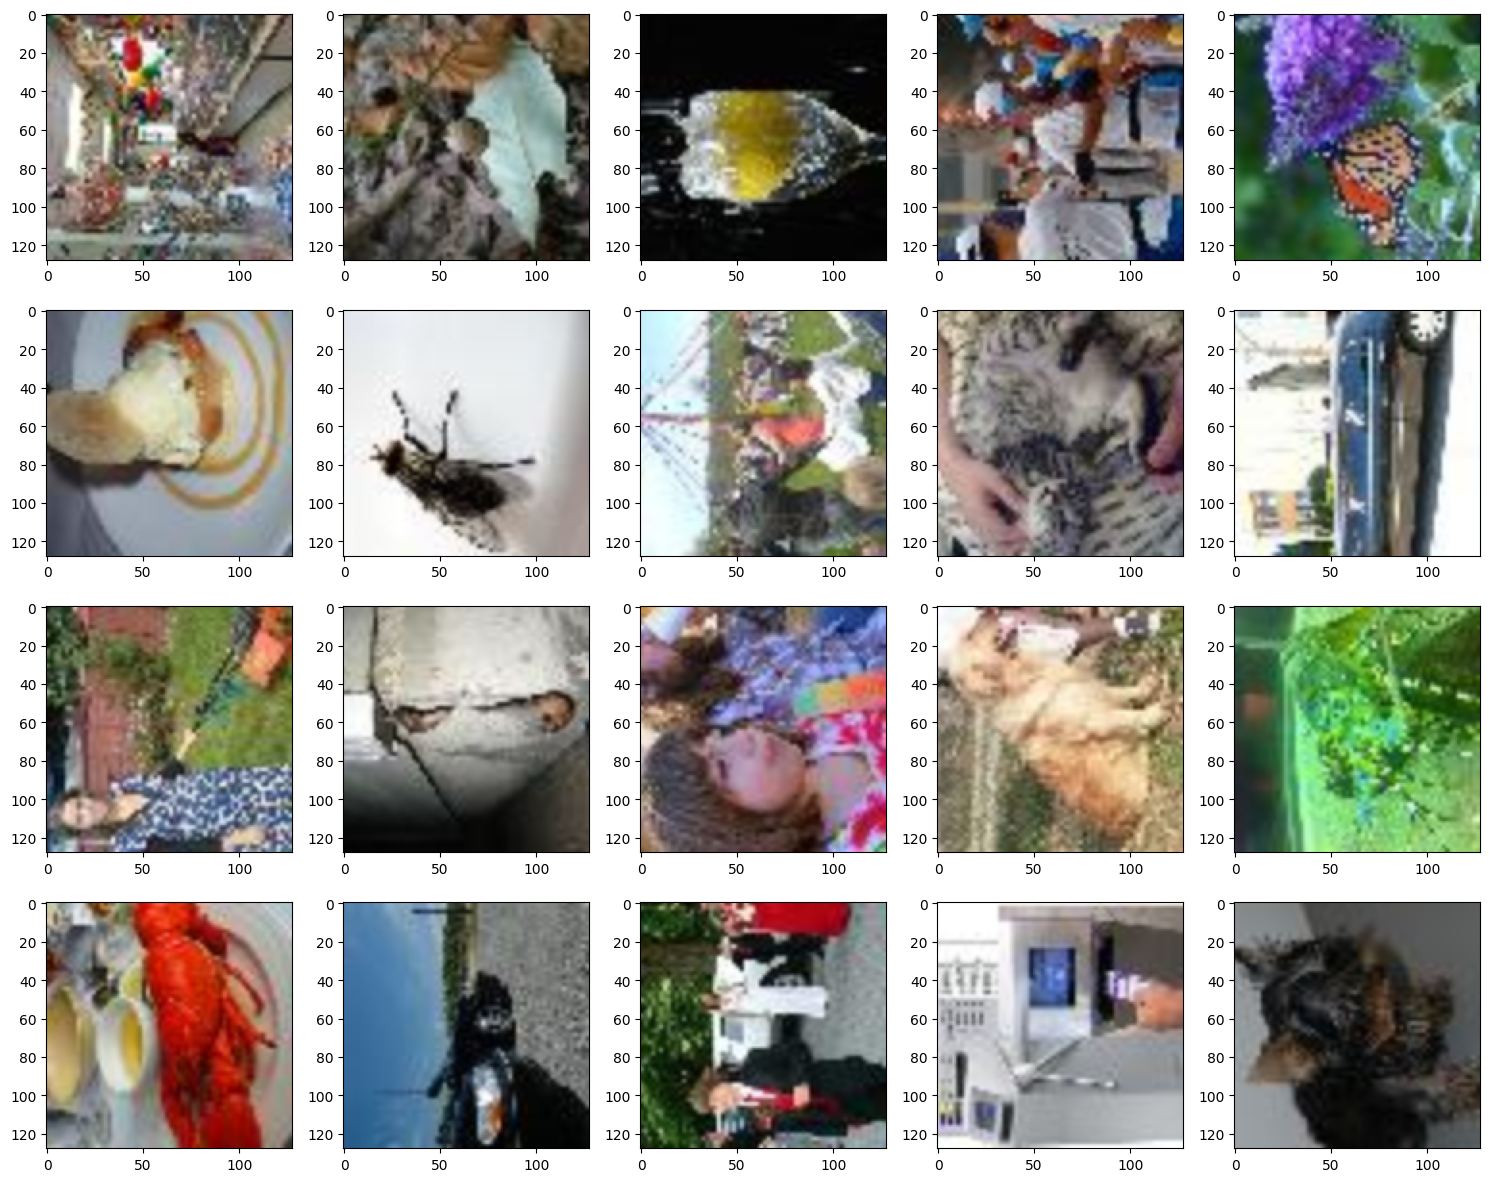

In [ ]:
rows, cols  = (4,5)

axes=[]

fig=plt.figure(figsize=(15,3*rows))

indices = np.random.randint(0, len(train_dataset), rows*cols)

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    plt.imshow(train_dataset[indices[a]][0].numpy().T)

fig.tight_layout()
plt.show()

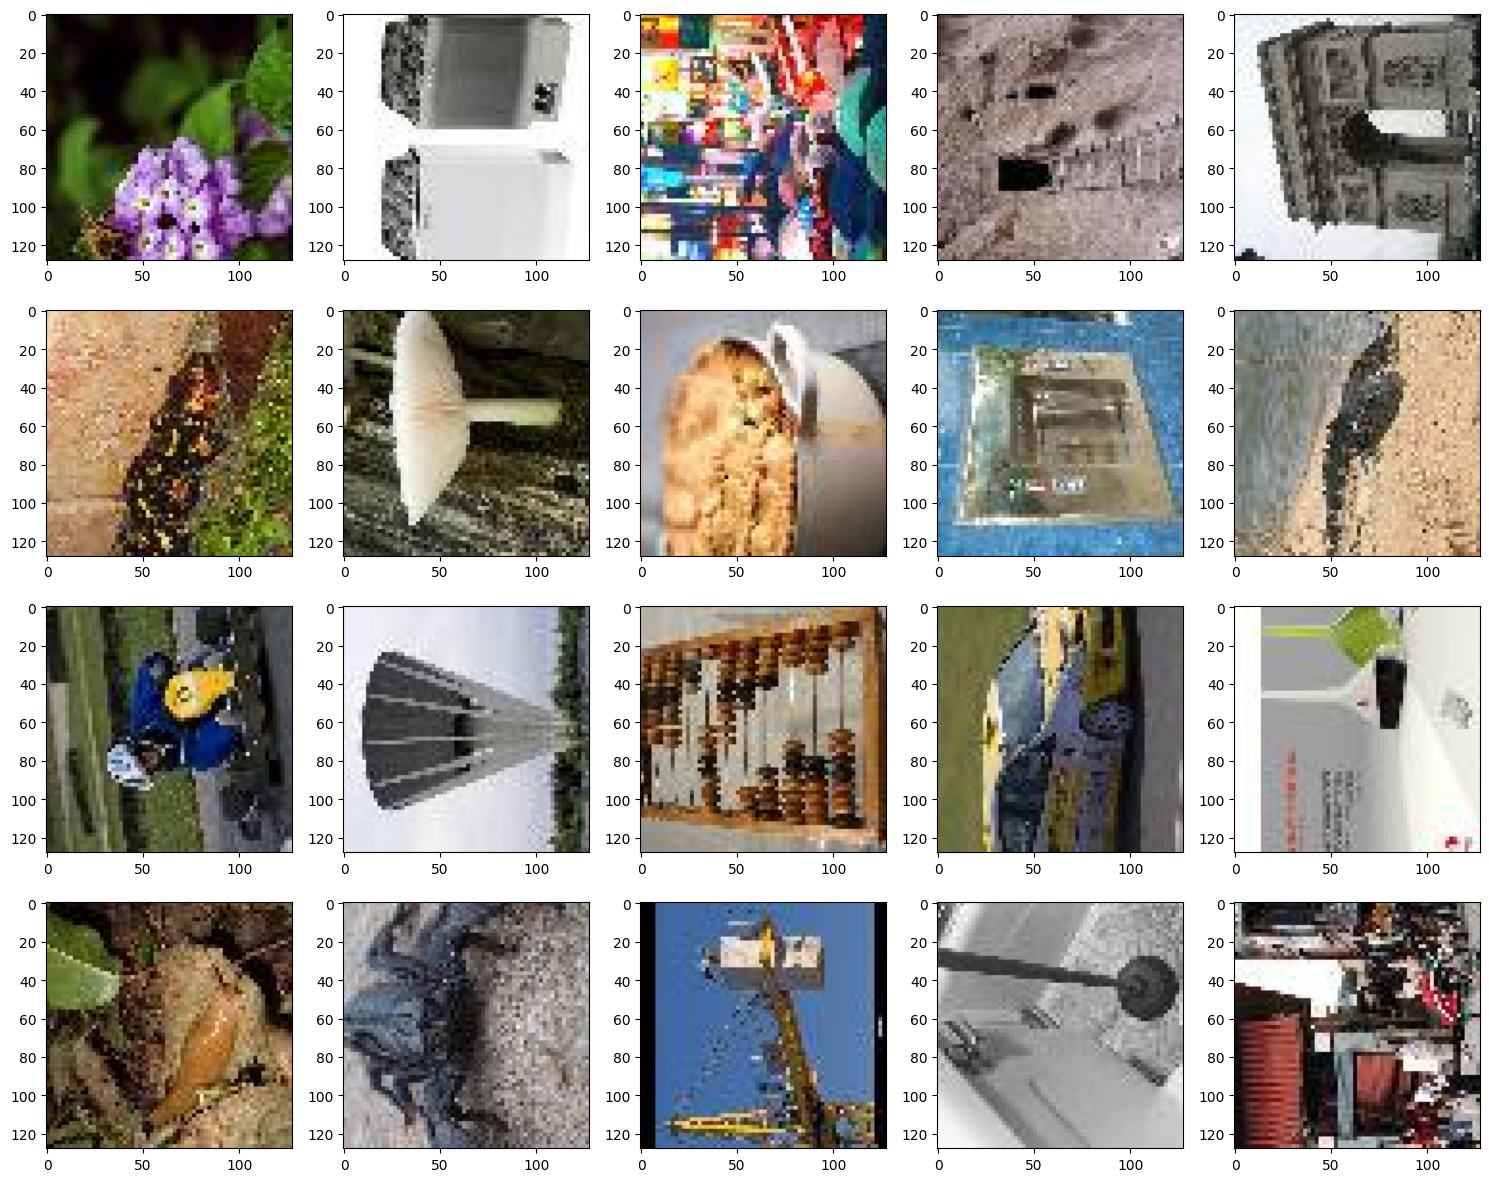

In [ ]:
rows, cols  = (4,5)

axes=[]

fig=plt.figure(figsize=(15,3*rows))

indices = np.random.randint(0, len(val_dataset),
                            rows*cols)

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    plt.imshow(val_dataset[indices[a]][0].numpy().T)

fig.tight_layout()
plt.show()

### Параллельная загрузка данных

Dataloader имеет аргумент ```num_workers```: в нем указывается кол-во тредов, которые параллельно будут загружать данные из датасета. Для ускорения работы можно ставить это значение бОльше, чем единица.

Еще один аргумент - это ```pin_memory```. Включив его, мы ускоряем копирование данных между ЦПУ и ГПУ, так как в оперативной памяти резервируется память, и копирование на ГПУ осуществляется только с зарезервированного (pinned) участка.

На практике, существуют более эффективные загрузчики данных (например, nvidia DALI). Однако сегодня мы их не будем рассматривать :(

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True,
    pin_memory=True,
    num_workers=2,
)

# disable shuffling
test_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=128,
    shuffle=False,
    pin_memory=True,
    num_workers=2
)

### Sanity check

x должен иметь следующий размер:

$$(N_{batch}, C, H, W)$$

y должен иметь размер

$$(N_{batch}, 1)$$

In [ ]:
for x,y in train_loader:
    print(x.shape, y.shape)
    break

for x,y in test_loader:
    print(x.shape, y.shape)
    break

print()

rand_batch = torch.rand(32,3,128,128)
print(model(rand_batch).argmax(dim=1).shape)

torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])

torch.Size([32])


### Вывод информации о модели

Маленькая библиотека ```torchsummary``` позволяет рассмотреть модель на предмет кол-ва параметров и архитектуры.

Устанавливается эта библиотека командой ```pip install torchsummary```.

In [ ]:
from torchsummary import summary

In [ ]:
summary(model.cpu(), input_size=(3,128,128), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 31, 31]          23,296
              ReLU-2           [-1, 64, 31, 31]               0
         MaxPool2d-3           [-1, 64, 15, 15]               0
            Conv2d-4          [-1, 192, 15, 15]         307,392
              ReLU-5          [-1, 192, 15, 15]               0
         MaxPool2d-6            [-1, 192, 7, 7]               0
            Conv2d-7            [-1, 384, 7, 7]         663,936
              ReLU-8            [-1, 384, 7, 7]               0
            Conv2d-9            [-1, 256, 7, 7]         884,992
             ReLU-10            [-1, 256, 7, 7]               0
           Conv2d-11            [-1, 256, 7, 7]         590,080
             ReLU-12            [-1, 256, 7, 7]               0
        MaxPool2d-13            [-1, 256, 3, 3]               0
AdaptiveAvgPool2d-14            [-1, 25

### Копирование на ГПУ

Мы прошли все базовые проверки, можно загружать модель на видеокарту.

In [ ]:
model.cuda()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

Ниже приведена строчки, которая заглушает все warning-и. Делать это не очень хорошо, но мы воспользуемся этой функцией, чтобы читаемость вывода кода была лучше

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Training loop

Training loop - это обиходное название цикла, в котором происходит обучение. Этот цикл мы уже регулярно писали, поэтому ничего нового тут нет.

In [ ]:
def accuracy_score_gpu(y_true, y_pred):
    return ((y_true==y_pred).sum()/y_true.shape[0]).item()

In [ ]:
epochs = 10
for i in range(epochs):
    model.train()

    for j, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        x = x.cuda()
        y = y.cuda()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        acc = accuracy_score_gpu(y, y_pred.detach().argmax(dim=1))
        if j%100 == 0:
            print(f"Epoch {i:3}\t iter {j:3}\t loss {loss:1.4}\t acc {acc:1.4}")
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        for j, (x, y) in enumerate(test_loader):
            x = x.cuda()
            y = y.cuda()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            acc = accuracy_score_gpu(y, y_pred.argmax(dim=1))
            if j%20==0:
                print(f"Epoch {i:3}\t iter {j:3}\t val_loss {loss:1.4}\t val_acc {acc:1.4}")

Epoch   0	 iter   0	 loss 5.51	 acc 0.01562
Epoch   0	 iter 100	 loss 3.951	 acc 0.1641
Epoch   0	 iter 200	 loss 3.4	 acc 0.2031
Epoch   0	 iter 300	 loss 3.221	 acc 0.3125
Epoch   0	 iter 400	 loss 2.687	 acc 0.375
Epoch   0	 iter 500	 loss 2.809	 acc 0.3125
Epoch   0	 iter 600	 loss 2.783	 acc 0.3516
Epoch   0	 iter 700	 loss 2.73	 acc 0.3672
Epoch   0	 iter   0	 val_loss 3.527	 val_acc 0.2266
Epoch   0	 iter  20	 val_loss 3.099	 val_acc 0.3281
Epoch   0	 iter  40	 val_loss 3.628	 val_acc 0.2109
Epoch   0	 iter  60	 val_loss 3.617	 val_acc 0.2344
Epoch   1	 iter   0	 loss 2.587	 acc 0.4062
Epoch   1	 iter 100	 loss 2.78	 acc 0.3672
Epoch   1	 iter 200	 loss 3.077	 acc 0.3125
Epoch   1	 iter 300	 loss 2.518	 acc 0.3906
Epoch   1	 iter 400	 loss 2.629	 acc 0.3984
Epoch   1	 iter 500	 loss 2.73	 acc 0.3672
Epoch   1	 iter 600	 loss 2.711	 acc 0.3672
Epoch   1	 iter 700	 loss 2.27	 acc 0.4375
Epoch   1	 iter   0	 val_loss 3.578	 val_acc 0.2656
Epoch   1	 iter  20	 val_loss 3.13	 val_acc

KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(), 'our_alexnet.pt')

### Какие метрики можно использовать вместо или вместе с accurcy?

- Precision,
- Recall,
- F-1 - score